# Pummels In Pittsburgh

Below is the analysis of our data set, involving the car crashes in Pittsburgh from 2004-2015. We attempt to create a model to predict the severity of the car crash, and use some of these models to determine which features tell us the most about the crash severity.

Note: A lot of our functionality was implemented in the cleaning.py and training.py classes, to allow us to work on the logic simultaneously via Visual Studio Live Share. Please see those files for more implementation information.

## Importing Data 

In [20]:
import cleaning as cleaning
import numpy as np
import matplotlib.pyplot as plt

data = cleaning.get_data("crash.csv")
cleaning.data_info(data)

    CRASH_CRN  DISTRICT  CRASH_COUNTY  MUNICIPALITY POLICE_AGCY  CRASH_YEAR  \
0  2004000001        11             2          2454       02454        2004   
1  2004000010        11             2          2440       02440        2004   
2  2004000016        11             2          2203       02203        2004   
3  2004000022        11             2          2404       02404        2004   
4  2004000030        11             2          2419       02419        2004   

   CRASH_MONTH  DAY_OF_WEEK  TIME_OF_DAY  HOUR_OF_DAY  ...  LANE_COUNT  \
0            1            5        257.0          2.0  ...         2.0   
1            1            5       1027.0         10.0  ...         2.0   
2            1            5       1839.0         18.0  ...         2.0   
3            1            6        914.0          9.0  ...         2.0   
4            1            5       2230.0         22.0  ...         2.0   

   RDWY_ORIENT  ROAD_OWNER  ROUTE  SPEED_LIMIT  SEGMENT  OFFSET  \
0            

## Dimensionality Reduction

In [21]:
# drop manually choosen columns
data = data.drop(data[cleaning.drops], axis=1) 

# drop anything having to do with the severity
data = data.drop(data[cleaning.sev_metric], axis=1) 

data.shape

(182782, 135)

In [23]:
# drop cols with a lot of missing vals
data = cleaning.drop_missing_vals(data) 

data.shape

Dropping columns with missing values > 10%:
Index([], dtype='object')


(182782, 121)

In [24]:
# drop highly corr features
data = cleaning.drop_highly_correlated_features(data)

Dropping 18 highly correlated columns
['LOCAL_ROAD_ONLY', 'INTERSECTION', 'MOTORCYCLE', 'BICYCLE', 'HVY_TRUCK_RELATED', 'DRINKING_DRIVER', 'DRIVER_16YR', 'DRIVER_17YR', 'DRIVER_65_74YR', 'DRIVER_75PLUS', 'DRIVER_18YR', 'DRIVER_19YR', 'DRIVER_20YR', 'DRIVER_50_64YR', 'COMM_VEHICLE', 'IMPAIRED_DRIVER', 'DEER_RELATED', 'DRUG_RELATED']


## Data Cleaning

In [25]:
# change Y/N to bool values
data = cleaning.yn_to_bool(data, cleaning.yn_columns) 

# drop rows that aren't in pittsburg
data = cleaning.fix_lat_long(data)

# drop cols with strings
data = cleaning.get_rid_of_strs(data)

cleaning.data_info(data)

    CRASH_MONTH  DAY_OF_WEEK  HOUR_OF_DAY  ILLUMINATION  WEATHER  \
0             1            5          2.0             2      1.0   
1             1            5         10.0             1      1.0   
2             1            5         18.0             2      1.0   
6             1            6         14.0             1      1.0   
11            1            1         19.0             3      2.0   

    ROAD_CONDITION  COLLISION_TYPE  RELATION_TO_ROAD  INTERSECT_TYPE  \
0              0.0               7                 2               0   
1              6.0               7                 5               0   
2              0.0               7                 5               3   
6              0.0               1                 1               0   
11             1.0               2                 1               3   

    TCD_TYPE  ...  DRUGGED_DRIVER  HAZARDOUS_TRUCK  ILLEGAL_DRUG_RELATED  \
0          0  ...               0                0                     0   
1     

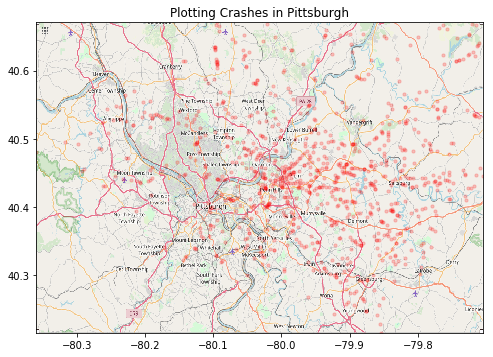

In [5]:
def plot_fatal_accidents(data):

    # Only get fatal crashes
    data = data[data['FATAL'] == 1]

    # Get n% of data
    n = 1
    data = (data.head(int(len(data)*n)))

    boundingBox = [data.DEC_LONG.min(),data.DEC_LONG.max(), data.DEC_LAT.min(), data.DEC_LAT.max()]
    background = plt.imread('pittsburgh.png')
    fig, ax = plt.subplots(figsize = (8,7))

    # heatmap = np.histogram2d(dataWithLocations.DEC_LONG, dataWithLocations.DEC_LAT, bins=100)
    ax.scatter(data.DEC_LONG, data.DEC_LAT, zorder=1, alpha= 0.2, c='r', s=10, marker='o')
    ax.set_title('Plotting Crashes in Pittsburgh')
    ax.imshow(background, zorder=0, extent = boundingBox, aspect= 'equal')
    plt.show()

plot_fatal_accidents(data)

Sevirity precentages:

Not injured        50.75%
Minor injury       19.09%
Injury Unknown     14.64%
Moderate injury    9.402%
Unknown            3.592%
Major injury       1.954%
Killed             0.554%
Name: MAX_SEVERITY_LEVEL, dtype: object


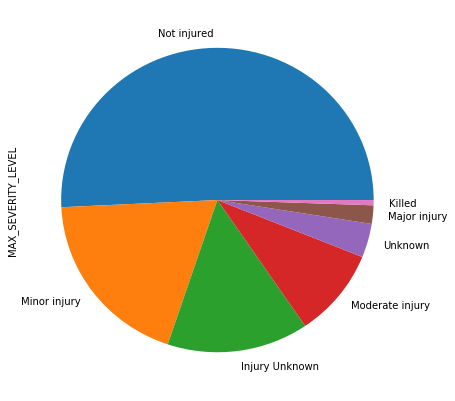

In [2]:
#first figuer pie char of injury level

labels={0:'Not injured',
1:'Killed',
2:'Major injury',
3:'Moderate injury',
4:'Minor injury',
8:'Injury Unknown',
9:'Unknown'}
severity_data=data['MAX_SEVERITY_LEVEL'].value_counts()
severity_data= severity_data.rename(labels)
severity_data.plot.pie(figsize=(7,7))
total = severity_data.sum()
sev = severity_data.apply(lambda x: str(x/total*100)[:5]+'%')
print('Sevirity precentages:\n')
print(sev)

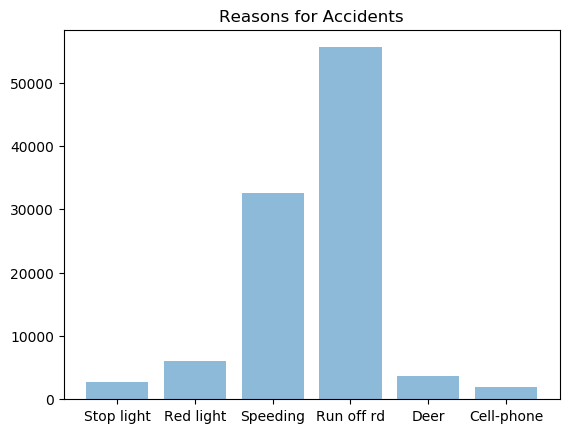

In [26]:
#second figure : reasons for accidents:
reasons=[
'RUNNING_STOP_SIGN',
'RUNNING_RED_LT',
'SPEEDING_RELATED',
'SV_RUN_OFF_RD',
'SUDDEN_DEER',
'CELL_PHONE',
]
labels = ['Stop light','Red light','Speeding','Run off rd','Deer','Cell-phone']
total =0
counts=[]
for i in reasons:
    total+=len(data[data[i]==1].index)
    counts.append(len(data[data[i]==1].index))
y_pos = np.arange(len(reasons))
plt.rcdefaults()
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.title('Reasons for Accidents')
plt.show()




In [27]:
#feature engineering
#creat new categorical column for time of day
import pandas as pd
data = get_data("crash.csv")
f = data['TIME_OF_DAY'].dropna()
f = data.loc[(data.TIME_OF_DAY > 0) & (data.TIME_OF_DAY < 2400)]
f=f[f['AGGRESSIVE_DRIVING']==1]

bins = [-np.inf,600,1200,1800,2400]

labels=['Late Night','Morning','Afternoon','Night']

f['time'] = pd.cut(data.TIME_OF_DAY, bins=bins, labels=labels)

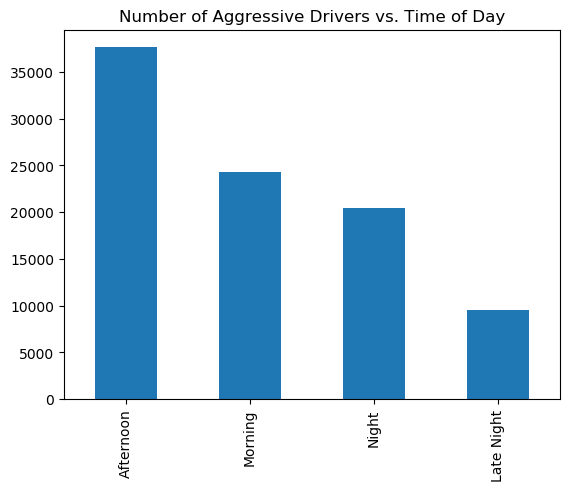

In [28]:
#figure 3 : aggresive drivers per time of day
#late night:12am-6am, morning :6am
plt.title('Number of Aggressive Drivers vs. Time of Day')
f['time'].value_counts().plot(kind='bar')

